In [4]:
import polars as pl
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
returns = []
volatilities = []

for file in glob.glob("../data/stock/*.csv"):

    df = pl.read_csv(file)
    return_history = df.select((pl.col("Close") / pl.col("Close").shift(1) - 1).alias("Return")).drop_nulls()
    dividend_history = df.with_columns(
                                (pl.col("Dividends") / pl.col("Close").shift(-1)).alias("Dividend_Return")
                        ).filter(
                                pl.col("Dividends") > 0
                        ).select(
                            pl.col("Dividend_Return")
                        ).drop_nulls()

    if dividend_history.shape[0] == 0:

        dividend_yield = 0.0

    else:

        years = datetime.datetime.strptime(df['Date'][-1], "%Y-%m-%d").year - datetime.datetime.strptime(df['Date'][0], "%Y-%m-%d").year
        num_dividends = dividend_history.shape[0] / years if years > 0 else 0
        dividend_yield = dividend_history.mean().item() * num_dividends

    returns.append(return_history.mean().item() * 246 + dividend_yield)
    volatilities.append(return_history.std().item() * np.sqrt(246))

returns = np.array(returns)
volatilities = np.array(volatilities)

Text(0.5, 1.0, 'Number of Stocks vs Magnitude (Return)')

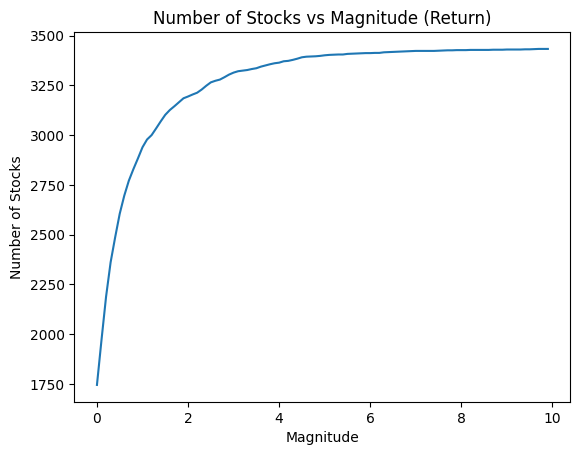

In [6]:
iq3 = np.quantile(returns, 0.75)
iq1 = np.quantile(returns, 0.25)
iqr = iq3 - iq1

mag_len = []

for i in np.arange(0.0, 10.0, 0.1):

    mag_len.append(len(returns[(returns >= iq1 - i * iqr) & (returns <= iq3 + i * iqr)]))

plt.plot(np.arange(0.0, 10.0, 0.1), mag_len)
plt.xlabel("Magnitude")
plt.ylabel("Number of Stocks")
plt.title("Number of Stocks vs Magnitude (Return)")

3401


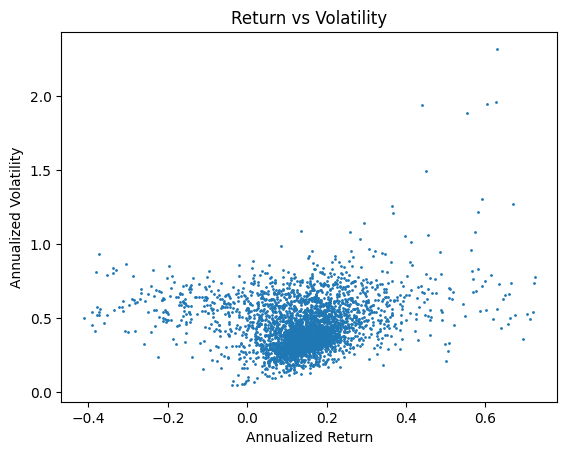

In [7]:
iq3 = np.quantile(returns, 0.75)
iq1 = np.quantile(returns, 0.25)
iqr = iq3 - iq1

mag = 5.0

mask_ret = (returns >= iq1 - mag * iqr) & (returns <= iq3 + mag * iqr)

plt.scatter(returns[mask_ret], volatilities[mask_ret], s = 1)
plt.xlabel("Annualized Return")
plt.ylabel("Annualized Volatility")
plt.title("Return vs Volatility")

print(len(returns[mask_ret]))

Text(0.5, 1.0, 'Number of Stocks vs Magnitude (Volatility)')

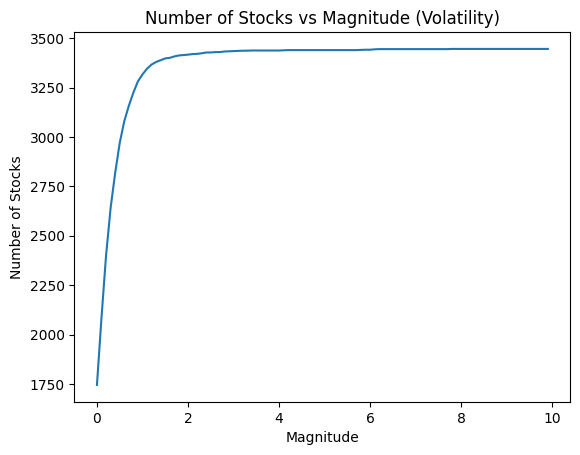

In [8]:
iq3 = np.quantile(volatilities, 0.75)
iq1 = np.quantile(volatilities, 0.25)
iqr = iq3 - iq1

mag_len = []

for i in np.arange(0.0, 10.0, 0.1):

    mag_len.append(len(returns[(volatilities >= iq1 - i * iqr) & (volatilities <= iq3 + i * iqr)]))

plt.plot(np.arange(0.0, 10.0, 0.1), mag_len)
plt.xlabel("Magnitude")
plt.ylabel("Number of Stocks")
plt.title("Number of Stocks vs Magnitude (Volatility)")

3417


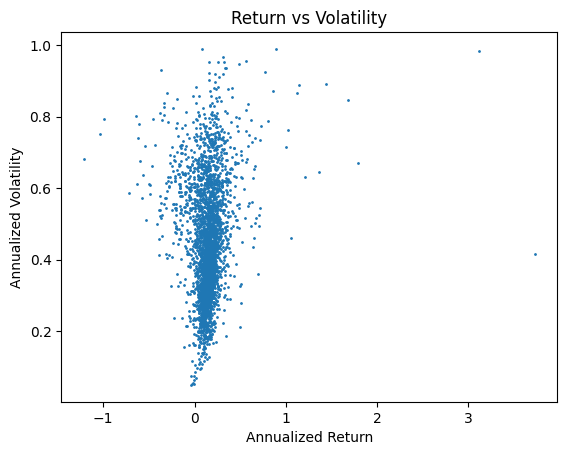

In [9]:
iq3 = np.quantile(volatilities, 0.75)
iq1 = np.quantile(volatilities, 0.25)
iqr = iq3 - iq1

mag = 2.0

mask_vol = (volatilities >= iq1 - mag * iqr) & (volatilities <= iq3 + mag * iqr)

plt.scatter(returns[mask_vol], volatilities[mask_vol], s = 1)
plt.xlabel("Annualized Return")
plt.ylabel("Annualized Volatility")
plt.title("Return vs Volatility")

print(len(returns[mask_vol]))

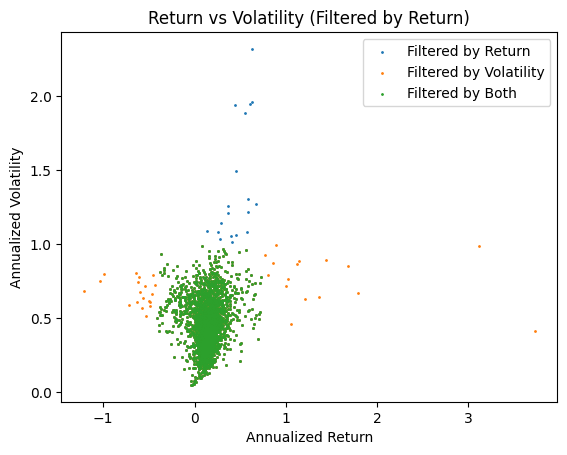

: 

In [ ]:
fig, ax = plt.subplots()

ax.scatter(returns[mask_ret], volatilities[mask_ret], s = 1, label='Filtered by Return')
ax.scatter(returns[mask_vol], volatilities[mask_vol], s = 1, label='Filtered by Volatility')
ax.scatter(returns[(mask_ret & mask_vol)], volatilities[(mask_ret & mask_vol)], s = 1, label='Filtered by Both')

ax.set_xlabel("Annualized Return")
ax.set_ylabel("Annualized Volatility")
ax.set_title("Return vs Volatility (Filtered by Return)")
ax.legend()